## PID Controlling

The **PID controller** generates a control signal based on the difference between the desired setpoint and the current system output.  
For implementation in code, we use a discrete version:

$$
u[n] = K_p \cdot e[n] + K_i \cdot \sum_{i=0}^{n} e[i] \cdot \Delta t + K_d \cdot \frac{e[n] - e[n-1]}{\Delta t}
$$


### Individual PID Terms

- **Proportional Term**:
  $$
  P = K_p \cdot e[n]
  $$

- **Integral Term**:
  $$
  I = K_i \cdot \sum_{i=0}^{n} e[i] \cdot \Delta t
  $$

- **Derivative Term**:
  $$
  D = K_d \cdot \frac{e[n] - e[n-1]}{\Delta t}
  $$

---

### Final Control Output

$$
\text{Control Output} = P + I + D
$$


In [2]:
# importing essential libraries
import time
import matplotlib.pyplot as plt
import numpy as np

#### P & PI Controllers for a Servo Motor

Steady state error is introduced as a speed reduction due to a load  
P controller is not achieving the desired position  
PI controller is able to achieve the desired position

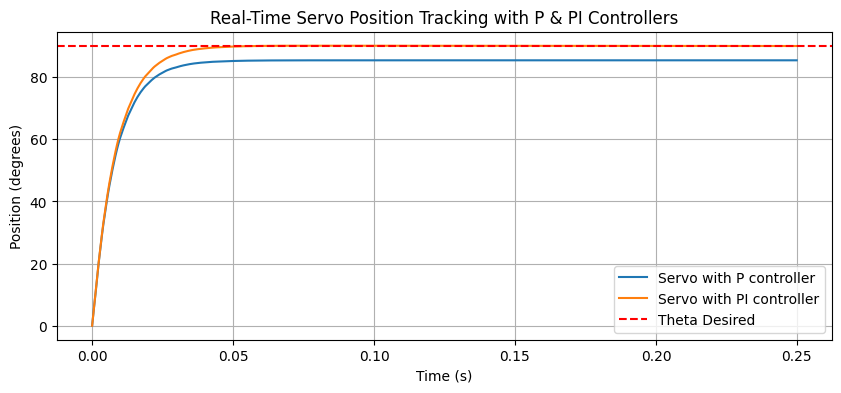

In [4]:
# parameters
theta_desired = 90
Kp = 330
Ki = 5500
Kd = 0
dt = 0.0002 # a value between 0.2-1 ms
total_time = 0.25

start_time = time.time()

# for data logging
time_log = []
theta_log_P = []
theta_log_PI = []

integral_P = 0
integral_PI = 0
prev_error_P = 0
prev_error_PI = 0

theta_current_P = 0
theta_current_PI = 0

time_log.append(0)
theta_log_P.append(theta_current_P)
theta_log_PI.append(theta_current_PI)

while ((time.time() - start_time) < total_time):
    current_time = time.time() - start_time

    # closed loop control logic
    error_P = theta_desired - theta_current_P
    error_PI = theta_desired - theta_current_PI
    integral_PI += error_PI * dt
    # derivative = (error - prev_error) / dt
    
    speed_P = Kp * error_P
    speed_PI = Kp * error_PI + Ki * integral_PI

    # speed gets reduced due to a load, therefore a steady state error is introduced
    speed_P -= 1500
    speed_PI -= 1500
    
    theta_current_P += speed_P * dt
    theta_current_PI += speed_PI * dt
    prev_error_P = error_P
    prev_error_PI = error_PI

    time_log.append(current_time)
    theta_log_P.append(theta_current_P)
    theta_log_PI.append(theta_current_PI)

    time.sleep(dt)

x = np.array(time_log)
y = np.array(theta_log_P)
z = np.array(theta_log_PI)

# plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(x, y, label="Servo with P controller")
ax.plot(x, z, label="Servo with PI controller")
plt.axhline(theta_desired, color='r', linestyle='--', label="Theta Desired")
plt.xlabel("Time (s)")
plt.ylabel("Position (degrees)")
plt.title("Real-Time Servo Position Tracking with P & PI Controllers")
plt.grid(True)
plt.legend()
plt.show()